In [26]:
#Step One: Get Bitcoin and Ethereum Price Data 
import requests
import datetime
import pandas as pd
import matplotlib.pyplot as p
%matplotlib inline
p.style.use('fivethirtyeight')


def price(symbol, comparison_symbols=['USD'], exchange=''):
    url = 'https://min-api.cryptocompare.com/data/price?fsym={}&tsyms={}'\
            .format(symbol.upper(), ','.join(comparison_symbols).upper())
    if exchange:
        url += '&e={}'.format(exchange)
    page = requests.get(url)
    data = page.json()
    return data

In [45]:
btc_price = price('BTC',exchange='coinbase')
print('Bitcoin: ',btc_price)
eth_price = price('ETH',exchange='coinbase')
print('Etherium: ',eth_price)

Bitcoin:  {'USD': 11474.83}
Etherium:  {'USD': 941.7}


In [56]:
#Step Two: Draw Line Charts for Historical Prices
#Step Three: Update the Line Charts every few minutes using the Latest Prices  

def daily_price_historical(symbol, comparison_symbol, all_data=True, limit=1, aggregate=1, exchange=''):
    url = 'https://min-api.cryptocompare.com/data/histominute?fsym={}&tsym={}&limit={}&aggregate={}'\
        .format(symbol.upper(), comparison_symbol.upper(), limit, aggregate)
    if exchange:
        url += '&e={}'.format(exchange)
    if all_data:
        url += '&allData=true'
    page = requests.get(url)
    data = page.json()['Data']
    df = pd.DataFrame(data)
    df['timestamp'] = [datetime.datetime.fromtimestamp(d) for d in df.time]
    return df

<function matplotlib.pyplot.show>

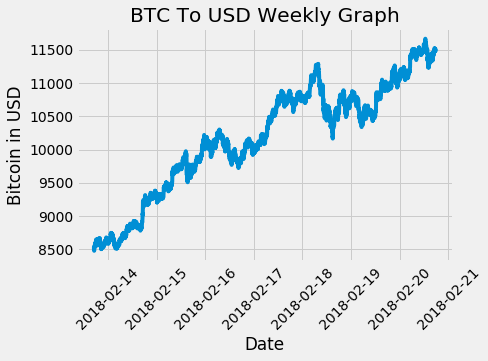

In [57]:
df=daily_price_historical('BTC','USD')
p.plot(df.timestamp,df.close)
p.title('BTC To USD Weekly Graph')
p.xlabel('Date')
p.ylabel('USD')
p.xticks(rotation=45)
p.show

<function matplotlib.pyplot.show>

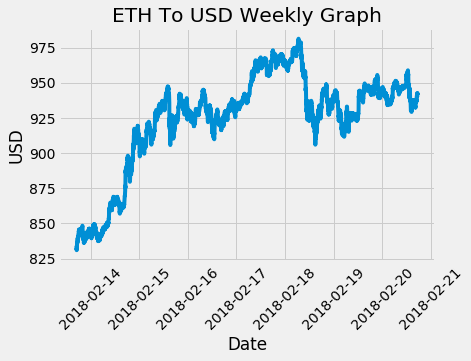

In [59]:
df=daily_price_historical('ETH','USD')
p.plot(df.timestamp,df.close)
p.title('ETH To USD Weekly Graph')
p.xlabel('Date')
p.ylabel('USD')
p.xticks(rotation=45)
p.show